## Purpose

The purpose of this one is to show that the relationship between critic-output and true-output is much tighter than the relationship between CE and true-output.

### Method

The data is generated from the fully trained actor-critic model, on the testing dataset. For the testing dataset, I got the Cross-Entropy, the NDCG, and the critic's output to compare.

### The story
The story is that the critic's output is much better correlated with the true measure than the CE is.
Subtracting out the minimum NLL 


In [45]:
"""First, load the inputs and import your stuff"""

import matplotlib.pyplot as plt
import json
import seaborn as sns
import numpy as py
sns.set()


with open("./data/data.json", "r") as f:
    data_obj = json.loads(f.read())

    
print(data_obj.keys())

print(len(data_obj['all_num_items_per_user']))


[u'all_ndcgs', u'all_num_items_per_user', u'all_ces', u'all_critic_outputs']
10000


In [2]:
# """
# Now, make plots that show a more linear relationship in one than the other.
# """
# plt.clf()

# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# axs[0].scatter(data_obj['all_ndcgs'], data_obj['all_critic_outputs'], label="CriticOut Vs NDCG")
# axs[1].scatter(data_obj['all_ndcgs'], data_obj['all_ces'], color='red')
# axs[0].set_title("Critic Output Vs True NDCG", fontsize=20)
# axs[1].set_title("Multinomial Log Likelihood Vs True NDCG", fontsize=20)



# # plt.scatter(data_obj['all_ndcgs'], data_obj['all_critic_outputs'])

# # plt.scatter(data_obj['all_ndcgs'], data_obj['all_critic_outputs'])


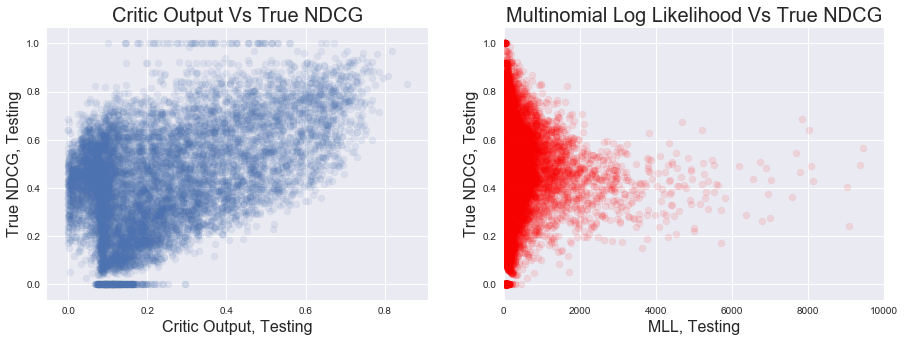

In [12]:
"""
In case we think this direction is more illustrative
"""
plt.clf()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axs[0].scatter(data_obj['all_critic_outputs'], data_obj['all_ndcgs'], label="Testing CriticOut Vs NDCG", alpha=0.1)
axs[0].set_xlabel("Critic Output, Testing", fontsize=16)
axs[0].set_ylabel("True NDCG, Testing", fontsize=16)
axs[0].set_title("Critic Output Vs True NDCG", fontsize=20)

axs[1].scatter(data_obj['all_ces'], data_obj['all_ndcgs'], color='red', alpha=0.1)
axs[1].set_title("Multinomial Log Likelihood Vs True NDCG", fontsize=20)
axs[1].set_xlabel("MLL, Testing", fontsize=16)
axs[1].set_ylabel("True NDCG, Testing", fontsize=16)
axs[1].set_xlim(0, 10000)
plt.show()

# plt.scatter(data_obj['all_ndcgs'], data_obj['all_critic_outputs'])

# plt.scatter(data_obj['all_ndcgs'], data_obj['all_critic_outputs'])

Pearson R for critic output: (0.4881255784349981, 0.0)


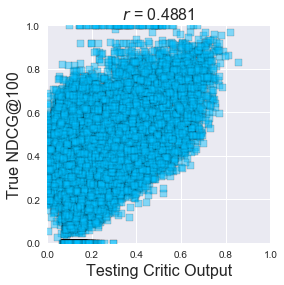

In [81]:
import scipy


pearson_r_critic_output = scipy.stats.pearsonr(data_obj['all_ndcgs'], data_obj['all_critic_outputs'])
print("Pearson R for critic output: {}".format(pearson_r_critic_output))


fig=plt.figure(figsize=(4,4))



plt.scatter(data_obj['all_critic_outputs'], data_obj['all_ndcgs'], label="Testing CriticOut Vs NDCG", facecolor='deepskyblue',marker= 's', edgecolors='k', alpha=0.45)
plt.grid('on')

plt.xlabel('Testing Critic Output', fontsize=16)
plt.ylabel('True NDCG@100', fontsize=16)
plt.title('$r$ = 0.4881', fontsize=16)

plt.ylim(0,1)
plt.xlim(0,1)
plt.show()
fig.savefig('correlation_scatter_testing_ract.pdf', bbox_inches='tight')

Pearson R for cross entropy: (0.049987538451187932, 5.6958169146026562e-07)


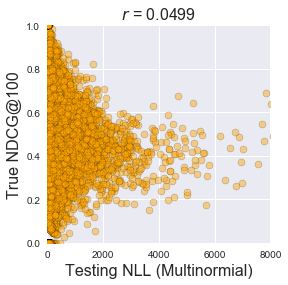

In [80]:
pearson_r_ce = scipy.stats.pearsonr(data_obj['all_ndcgs'], data_obj['all_ces'])
print("Pearson R for cross entropy: {}".format(pearson_r_ce))


fig=plt.figure(figsize=(4,4))

plt.scatter(data_obj['all_ces'], data_obj['all_ndcgs'], label="Testing CriticOut Vs NDCG", facecolor='orange',marker= 'o', edgecolors='k', alpha=0.45)
plt.grid('on')

plt.xlabel('Testing NLL (Multinormial)', fontsize=16)
plt.ylabel('True NDCG@100', fontsize=16)
plt.title('$r$ = 0.0499', fontsize=16)

plt.ylim(0,1)
plt.xlim(0,8000)
plt.show()
fig.savefig('correlation_scatter_testing_softmax.pdf', bbox_inches='tight')

## Now, let's see if we can find some numbers that are useful to us in terms of correlations

In [46]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

import scipy

pearson_r_ce = scipy.stats.pearsonr(data_obj['all_ndcgs'], data_obj['all_ces'])
pearson_r_critic_output = scipy.stats.pearsonr(data_obj['all_ndcgs'], data_obj['all_critic_outputs'])

print("Pearson R for cross entropy: {}".format(pearson_r_ce))
print("Pearson R for critic output: {}".format(pearson_r_critic_output))

# print("R-Squared cross entropy: {}".format(pearson_r_ce[0]**2))
# print("R-Squared for critic output: {}".format(pearson_r_critic_output[0]**2))


# slope_ce, intercept_ce, r_value_ce, p_value_ce, std_err_ce = scipy.stats.linregress(data_obj['all_ndcgs'], data_obj['all_ces'])
# slope_critic_output, intercept_critic_output, r_value_critic_output, p_value_critic_output, std_err_critic_output = scipy.stats.linregress(data_obj['all_ndcgs'], data_obj['all_critic_outputs'])

# print("R-Squared correlation for cross entropy: {}".format(r_value_ce**2))
# print("R-Squared correlation for critic output: {}".format(r_value_critic_output**2))



Pearson R for cross entropy: (0.049987538451187932, 5.6958169146026562e-07)
Pearson R for critic output: (0.4881255784349981, 0.0)


In [5]:
# # We can actually get rid of some constant values in order to make the MLL plot a little bit clearer.
# import numpy as np
# import math

# mll = np.asarray(data_obj['all_ces'])
# num_users = np.asarray(data_obj['all_num_items_per_user'])

# min_mll_per_sample = np.asarray([(num * math.log(num)) for num in num_users])

# print(np.min(min_mll_per_sample))


# mll_with_min_subtracted = mll - min_mll_per_sample

# print(mll_with_min_subtracted.max())





In [6]:
# plt.clf()

# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# axs[0].scatter(data_obj['all_critic_outputs'], data_obj['all_ndcgs'], label="CriticOut Vs NDCG")
# axs[1].scatter(mll_with_min_subtracted, data_obj['all_ndcgs'], color='red')
# axs[0].set_title("Critic Output Vs True NDCG", fontsize=20)
# axs[1].set_title("MLL-with-min-subtracted Vs True NDCG", fontsize=20)


In [7]:
# pearson_r_ce_minus_min = scipy.stats.pearsonr(data_obj['all_ndcgs'], mll_with_min_subtracted)

# print(pearson_r_ce_minus_min)


In [8]:
# plt.clf()

# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# axs[0].scatter(data_obj['all_critic_outputs'], data_obj['all_ndcgs'], label="CriticOut Vs NDCG")
# axs[1].scatter(mll_with_min_subtracted / num_users, data_obj['all_ndcgs'], color='red')
# axs[0].set_title("Critic Output VS True NDCG", fontsize=20)
# axs[1].set_title("MLL-with-min-subtracted-and-divided-by-Count VS True NDCG", fontsize=20)


In [9]:
# pearson_r_ce_minus_min = scipy.stats.pearsonr(data_obj['all_ndcgs'], mll_with_min_subtracted / num_users)

# print(pearson_r_ce_minus_min)


In [10]:
# plt.clf()

# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# axs[0].scatter(data_obj['all_critic_outputs'], data_obj['all_ndcgs'], label="CriticOut Vs NDCG", alpha=0.1)
# axs[1].scatter(data_obj['all_ces'] / num_users, data_obj['all_ndcgs'], color='red')
# axs[0].set_title("Critic Output VS True NDCG", fontsize=20)
# axs[1].set_title("MLL-divided-by-Count VS True NDCG", fontsize=20)


In [47]:
pearson_r_ce_minus_min = scipy.stats.pearsonr(data_obj['all_ndcgs'], data_obj['all_ces'] / num_users)

print(pearson_r_ce_minus_min)


NameError: name 'num_users' is not defined

# Now, we do the same with Gaussian VAE

In [48]:
with open("./data/gaussian_vae_data.json", "r") as f:
    gaussian_data_obj = json.loads(f.read())


In [ ]:
# plt.clf()

# plt.scatter(gaussian_data_obj['all_critic_outputs'], gaussian_data_obj['all_ndcgs'], label="Gaussian CriticOut Vs NDCG", alpha=0.1)
# plt.title("Gaussian Critic output vs NDCG, testing", fontsize=20)
# plt.xlabel("Critic trained on Gaussian Likelihood Loss")
# plt.ylabel("True NDCG")
# plt.xlim(-0.001, 0.005)

In [ ]:
# import scipy
# pearson_r_gaussian_critic_vs_ndcg = scipy.stats.pearsonr(gaussian_data_obj['all_ndcgs'], gaussian_data_obj['all_critic_outputs'])
# print(pearson_r_gaussian_critic_vs_ndcg)

In [ ]:
# plt.clf()

# plt.scatter(gaussian_data_obj['all_ces'], gaussian_data_obj['all_ndcgs'], label="Gaussian CriticOut Vs NDCG", alpha=0.1)
# plt.title("Gaussian Critic output vs NDCG, testing", fontsize=20)
# plt.xlabel("Critic trained on Gaussian Likelihood Loss")
# plt.ylabel("True NDCG")
# # plt.xlim(-0.001, 0.005)

# NOW, on to Training-Data comparisons

In [49]:
with open("./data/mll_vae_training_data.json", "r") as f:
    training_data_obj = json.loads(f.read())

    
print(training_data_obj.keys())

print(len(training_data_obj['all_num_items_per_user']))


[u'all_ndcgs', u'all_num_items_per_user', u'all_ces', u'all_critic_outputs']
116500


In [50]:
print(np.asarray(training_data_obj['all_ndcgs']).mean())
print(np.asarray(training_data_obj['all_critic_outputs']).mean())


NameError: name 'np' is not defined

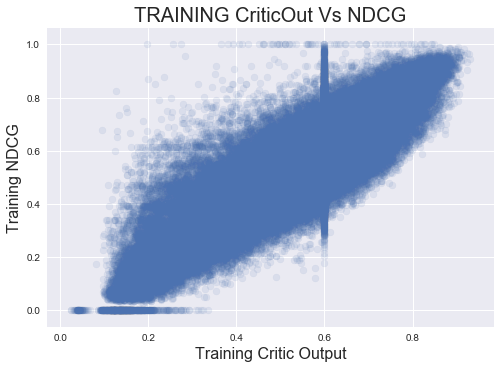

In [17]:


plt.scatter(training_data_obj['all_critic_outputs'], training_data_obj['all_ndcgs'],  alpha=0.1)
plt.title("TRAINING CriticOut Vs NDCG", fontsize=20)
plt.xlabel("Training Critic Output", fontsize=16)
plt.ylabel("Training NDCG", fontsize=16)
plt.show()

The r-score for critic-output vs ndcg, on training, is 0.850615768119


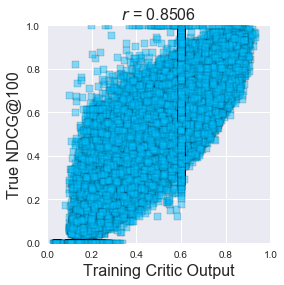

In [79]:
import scipy
pearson_r_training_critic_vs_ndcg = scipy.stats.pearsonr(training_data_obj['all_ndcgs'], training_data_obj['all_critic_outputs'])
print("The r-score for critic-output vs ndcg, on training, is {}".format(pearson_r_training_critic_vs_ndcg[0]))



fig=plt.figure(figsize=(4,4))

plt.scatter(training_data_obj['all_critic_outputs'], training_data_obj['all_ndcgs'], facecolor='deepskyblue',marker= 's', edgecolors='k', alpha=0.45)
plt.grid('on')

plt.xlabel('Training Critic Output', fontsize=16)
plt.ylabel('True NDCG@100', fontsize=16)
plt.title('$r$ = 0.8506', fontsize=16)

plt.ylim(0,1)
plt.xlim(0,1)
plt.show()
fig.savefig('correlation_scatter_training_ract.pdf', bbox_inches='tight')

The r-score for critic-output vs ndcg, on training, is 0.850615768119


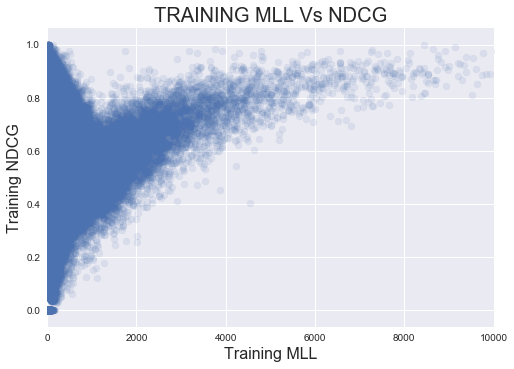

The r-score for MLL vs ndcg, on training, is 0.155603175544


In [52]:
import math

plt.scatter(training_data_obj['all_ces'], training_data_obj['all_ndcgs'], label="TRAINING MLL Vs NDCG", alpha=0.1)
plt.xlim(0, 10000)


plt.title("TRAINING MLL Vs NDCG", fontsize=20)
plt.xlabel("Training MLL", fontsize=16)
plt.ylabel("Training NDCG", fontsize=16)

plt.show()
pearson_r_training_mll_vs_ndcg = scipy.stats.pearsonr(training_data_obj['all_ces'], training_data_obj['all_critic_outputs'])

print("The r-score for MLL vs ndcg, on training, is {}".format(pearson_r_training_mll_vs_ndcg[0]))
# print(pearson_r_training_mll_vs_ndcg)



The r-score for MLL vs ndcg, on training, is 0.155603175544


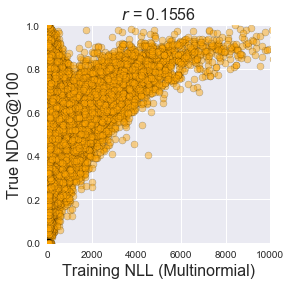

In [78]:
pearson_r_training_mll_vs_ndcg = scipy.stats.pearsonr(training_data_obj['all_ces'], training_data_obj['all_critic_outputs'])
print("The r-score for MLL vs ndcg, on training, is {}".format(pearson_r_training_mll_vs_ndcg[0]))


fig=plt.figure(figsize=(4,4))

plt.scatter(training_data_obj['all_ces'], training_data_obj['all_ndcgs'], facecolor='orange',marker= 'o', edgecolors='k', alpha=0.45)
plt.grid('on')

plt.xlabel('Training NLL (Multinormial)', fontsize=16)
plt.ylabel('True NDCG@100', fontsize=16)

plt.ylim(0.,1.00)
plt.xlim(0,10000)
plt.title('$r$ = 0.1556', fontsize=16)


plt.show()
fig.savefig('correlation_scatter_training_softmax.pdf', bbox_inches='tight')

In [20]:
# training_num_users = np.asarray(training_data_obj['all_num_items_per_user'])

# training_min_mll_per_sample = np.asarray([(num * math.log(num)) for num in training_num_users])

# training_mll_with_min_subtracted = np.asarray(training_data_obj['all_ces']) - training_min_mll_per_sample



# pearson_r_training_mll_min_subtracted_vs_ndcg = scipy.stats.pearsonr(training_mll_with_min_subtracted, training_data_obj['all_critic_outputs'])
# print(pearson_r_training_mll_min_subtracted_vs_ndcg)
